<a href="https://colab.research.google.com/github/WajeehaAslam/ML-lab/blob/main/Regularization_Effects_on_Healthcare_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

#  Load the dataset
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [9]:
# Drop unnecessary columns
drop_columns = ['Room Number', 'Discharge Date', 'Date of Admission', 'Hospital', 'Doctor', 'Name', 'Test Results']
target = 'Test Results'

In [10]:
# Prepare features and target
X = df.drop(columns=drop_columns)
y = df[target]

In [11]:
#  Identify numerical and categorical columns
numeric_features = ['Billing Amount']
categorical_features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']


In [12]:
print("data types:\n" , df.dtypes)

data types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


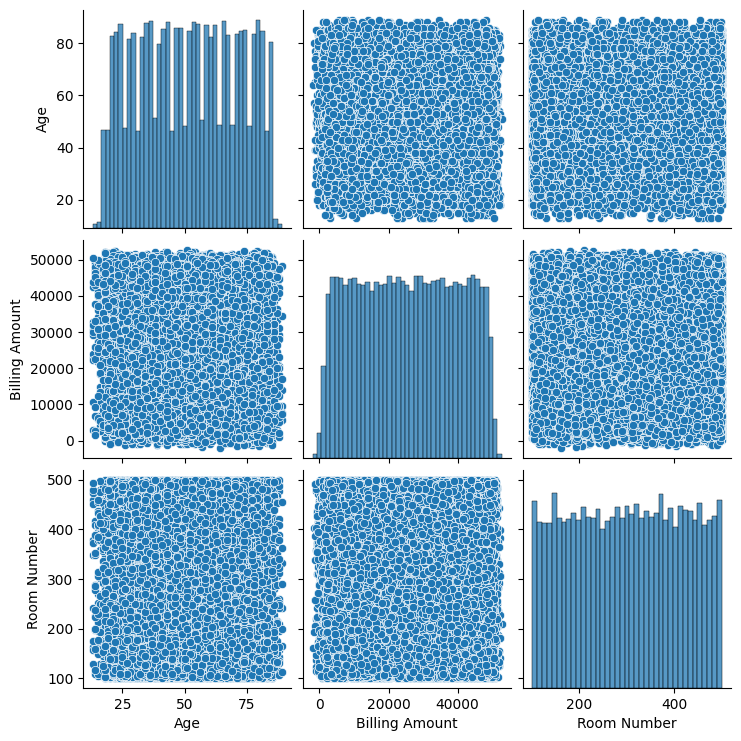

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [14]:
print(f'number of records :{df.shape[0]} ')
print(f'number of features :{df.shape[1]} ')

number of records :55500 
number of features :15 


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [20]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [21]:
# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [22]:
# Convert labels to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
num_classes = len(np.unique(y_train))

In [23]:
# Build the model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#  Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# 12. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)


Epoch 1/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3267 - loss: 1.1063 - val_accuracy: 0.3339 - val_loss: 1.0989
Epoch 2/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3466 - loss: 1.0981 - val_accuracy: 0.3468 - val_loss: 1.0987
Epoch 3/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3533 - loss: 1.0964 - val_accuracy: 0.3370 - val_loss: 1.0991
Epoch 4/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3650 - loss: 1.0954 - val_accuracy: 0.3427 - val_loss: 1.0995
Epoch 5/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3732 - loss: 1.0914 - val_accuracy: 0.3396 - val_loss: 1.1011
Epoch 6/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3835 - loss: 1.0879 - val_accuracy: 0.3406 - val_loss: 1.1030
Epoch 7/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4005 - loss: 1.0811 - val_accuracy: 0.3357 - val_loss: 1.1041
Epoch 8/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4078 - loss: 1

In [26]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3464 - loss: 1.1740

Test Accuracy: 0.3439


In [27]:
#  Classification report
y_pred = model.predict(X_test).argmax(axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.35      0.19      0.25      3741
Inconclusive       0.34      0.38      0.36      3600
      Normal       0.34      0.46      0.39      3759

    accuracy                           0.34     11100
   macro avg       0.35      0.34      0.33     11100
weighted avg       0.35      0.34      0.33     11100



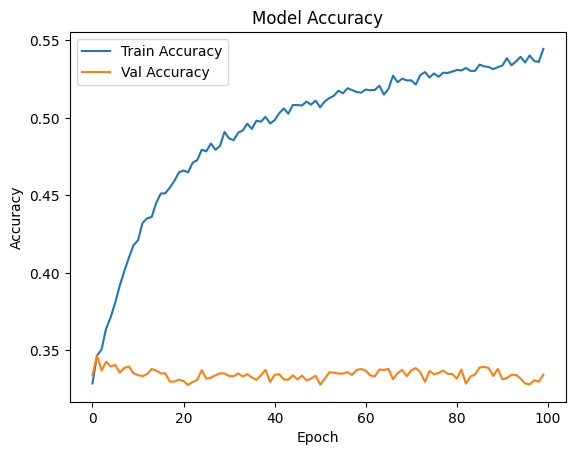

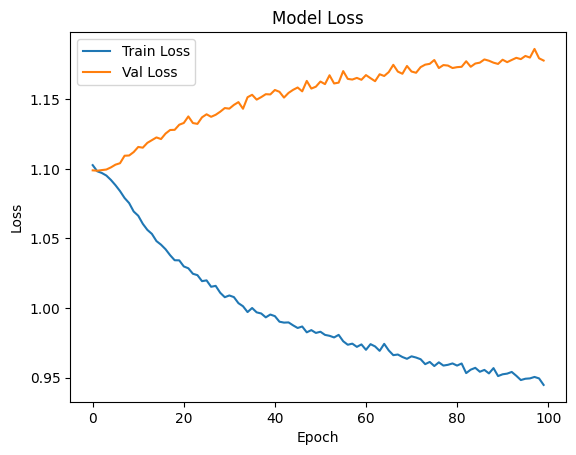

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

l2_values = [0.0, 0.001, 0.01, 0.1]
loss_per_lambda = {}
histories = {}

for l2_lambda in l2_values:
    print(f"\nTraining with L2 regularization = {l2_lambda}")

    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(3, activation='softmax'))  # 3 classes in 'Test Results'

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0)

    histories[l2_lambda] = history
    final_loss = history.history['val_loss'][-1]
    loss_per_lambda[l2_lambda] = final_loss


Training with L2 regularization = 0.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with L2 regularization = 0.001

Training with L2 regularization = 0.01

Training with L2 regularization = 0.1


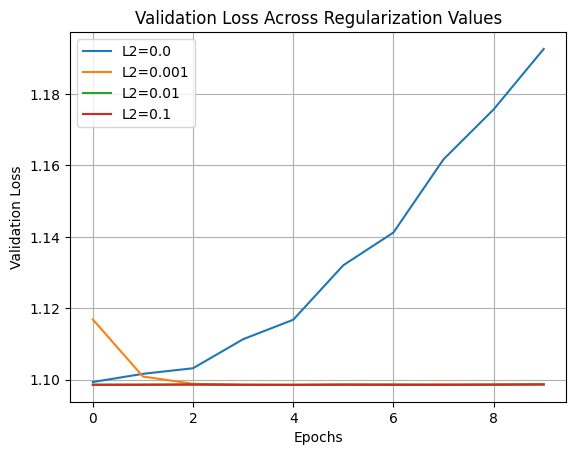

In [30]:
for l2_lambda, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'L2={l2_lambda}')

plt.title("Validation Loss Across Regularization Values")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

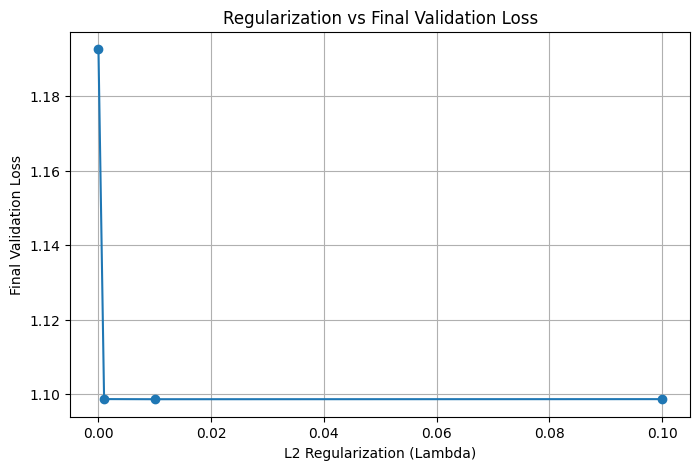

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(list(loss_per_lambda.keys()), list(loss_per_lambda.values()), marker='o')
plt.title("Regularization vs Final Validation Loss")
plt.xlabel("L2 Regularization (Lambda)")
plt.ylabel("Final Validation Loss")
plt.grid(True)
plt.show()